<a href="https://colab.research.google.com/github/ashtan2019/Week4_Health/blob/master/Health1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import cv2
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

In [0]:
os.environ['KAGGLE_USERNAME'] = "xxxxx"
os.environ['KAGGLE_KEY'] = "xxxxx"
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

401 - Unauthorized


In [0]:
!unzip chest-xray-pneumonia.zip
!unzip chest_xray.zip

In [0]:
file_path_train = "/content/chest_xray/train"
file_path_test = "/content/chest_xray/test"
file_path_val = "/content/chest_xray/val"
categories = ['NORMAL', 'PNEUMONIA']
img_size = 299

In [0]:
def get_data(file_path, categories, img_size):
    data = []
    for category in categories:
        c = categories.index(category)
        img_path = os.path.join(file_path, category)
        for img in os.listdir(img_path):
            try:
                a = cv2.imread(os.path.join(img_path, img))
                a = cv2.resize(a, (img_size, img_size))
                data.append([a, c])
            except Exception as e:
                pass
    return data
          
      

In [0]:
d_train = get_data(file_path_train, categories, img_size)
d_test = get_data(file_path_test, categories, img_size)
d_val = get_data(file_path_val, categories, img_size)

In [0]:
random.shuffle(d_train)
random.shuffle(d_test)
random.shuffle(d_val)

In [0]:
x_train = []
x_test = []
x_val = []

y_train = []
y_test = []
y_val = []


In [0]:
def spit_x_y(x, y, d):
    for i in d:
        x.append(i[0])
        y.append(i[1])

In [0]:
spit_x_y(x_train, y_train, d_train)
spit_x_y(x_test, y_test, d_test)
spit_x_y(x_val, y_val, d_val)


PNEUMONIA


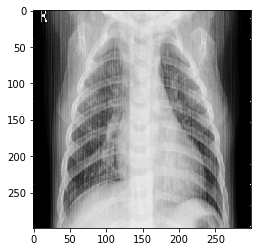

In [0]:
n1 = random.randint(0,800)
plt.imshow(x_train[n1])
print(categories[y_train[n1]])

PNEUMONIA


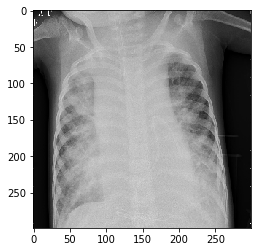

In [0]:
n2 = random.randint(0,800)
plt.imshow(x_train[n2])
print(categories[y_train[n2]])


In [0]:
def nump_con(x):
  x = np.array(x)
  x = x.reshape(-1, img_size, img_size, 3)
  return x

In [0]:
x_train = nump_con(x_train)
x_test = nump_con(x_test)
x_val = nump_con(x_val)

In [0]:
pk1 = open('x_train', 'wb')
pickle.dump(x_train, pk1)
pk1.close()


In [0]:
pk1 = open('y_train', 'wb')
pickle.dump(y_train, pk1)
pk1.close()

In [0]:
pk1 = open('x_test', 'wb')
pickle.dump(x_test, pk1)
pk1.close()

In [0]:
pk1 = open('y_test', 'wb')
pickle.dump(y_test, pk1)
pk1.close()

In [0]:
pk1 = open('x_val', 'wb')
pickle.dump(x_val, pk1)
pk1.close()

In [0]:
pk1 = open('y_val', 'wb')
pickle.dump(y_val, pk1)
pk1.close()

In [0]:
%who

Activation	 BatchNormalization	 Dense	 Dropout	 Flatten	 Model	 ModelCheckpoint	 NM	 Sequential	 
TensorBoard	 activation_layer	 activation_layers	 categories	 cv2	 d_test	 d_train	 d_val	 dense_layer	 
dense_layers	 drive	 end	 f	 file_path	 file_path_test	 file_path_train	 file_path_val	 get_data	 
i	 img_size	 j	 k	 layer_size	 layer_sizes	 model	 model_checkpoint	 n1	 
n2	 np	 nump_con	 opt	 os	 pickle	 pk1	 plt	 random	 
rmodel	 scores	 spit_x_y	 tensorboard	 tf	 time	 x_test	 x_train	 x_val	 
y_test	 y_train	 y_val	 


In [0]:
del	 plt,	 random,	 spit_x_y,	 x_test,	 x_train,	 x_val,	 y_test,	 y_train,	 y_val	 


In [0]:
%who

Interactive namespace is empty.


# Making machine learn


In [0]:
import time
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense, Flatten, Activation

In [0]:
layer_sizes = [32]
activation_layers = [1]
dense_layers = [1]


In [0]:
with open('x_train', 'rb+') as f:
  x_train = pickle.load(f)

In [0]:
with open('x_test', 'rb+') as f:
  x_test = pickle.load(f)
  


In [0]:
with open('y_train', 'rb+') as f:
  y_train = pickle.load(f)


In [0]:
with open('y_test', 'rb+') as f:
  y_test = pickle.load(f)


In [0]:
with open('x_val', 'rb+') as f:
  x_val = pickle.load(f)


In [0]:
with open('y_val', 'rb+') as f:
  y_val = pickle.load(f)


In [0]:
y_train = np.array(y_train)


In [0]:
y_test = np.array(y_test)


In [0]:
y_val = np.array(y_val)


In [0]:
x_train = x_train/255


In [0]:
x_test = x_test/255

In [0]:
x_val = x_val/255

In [0]:
model =  tf.keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
end = model.get_layer('avg_pool')
for i in range(model.layers.index(end)):
  model.layers[i].trainable = False
  
rmodel = Model(model.input, end.output)

In [0]:
import os
os.mkdir('models')
os.mkdir('logs')

In [0]:
!pip install -q tf-nightly-2.0-preview
%load_ext tensorboard

     |████████████████████████████████| 92.1MB 551kB/s 
     |████████████████████████████████| 450kB 45.0MB/s 
     |████████████████████████████████| 3.8MB 35.1MB/s 


In [0]:
%tensorboard --logdir=logs/

In [0]:
for layer_size in layer_sizes:
  for activation_layer in activation_layers:
    for dense_layer in dense_layers:

      NM = f"layer_size-{layer_size}, activation_layers-{activation_layer}, n_dense_layers-{dense_layer}-{time.time()}"
      tensorboard = TensorBoard(log_dir=f'logs/{NM}')

      model = Sequential()
      model.add(rmodel)

      model._layers[1].trainable = False

      for j in range(activation_layer):
        model.add(Activation('relu'))
    
      model.add(Flatten())

      for k in range(dense_layer):
        model.add(Dense(layer_size))
        model.add(Activation('relu'))
        model.add(Dropout(0.4))

      model.add(Dense(2))
      model.add(Activation("softmax"))

      opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)

      model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

      file_path = "Health_app-{epoch:0.2f}-{val_loss:.3f}"
      model_checkpoint = ModelCheckpoint(f'models/{file_path}', monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

      model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), callbacks=[tensorboard, model_checkpoint])

Train on 5216 samples, validate on 624 samples
Epoch 1/50
5184/5216 [============================>.] - ETA: 0s - loss: 0.3814 - acc: 0.8206
Epoch 00001: saving model to models/Health_app-1.00-0.723
5216/5216 [==============================] - 88s 17ms/sample - loss: 0.3814 - acc: 0.8209 - val_loss: 0.7234 - val_acc: 0.6298
Epoch 2/50
5184/5216 [============================>.] - ETA: 0s - loss: 0.2622 - acc: 0.8885
Epoch 00002: saving model to models/Health_app-2.00-1.235
5216/5216 [==============================] - 73s 14ms/sample - loss: 0.2624 - acc: 0.8884 - val_loss: 1.2346 - val_acc: 0.6250
Epoch 3/50
5184/5216 [============================>.] - ETA: 0s - loss: 0.2439 - acc: 0.8980
Epoch 00003: saving model to models/Health_app-3.00-1.300
5216/5216 [==============================] - 72s 14ms/sample - loss: 0.2435 - acc: 0.8980 - val_loss: 1.3000 - val_acc: 0.6250
Epoch 4/50
5184/5216 [============================>.] - ETA: 0s - loss: 0.2209 - acc: 0.9176
Epoch 00004: saving model 

In [0]:
%who


Activation	 BatchNormalization	 Dense	 Dropout	 Flatten	 Model	 ModelCheckpoint	 NM	 Sequential	 
TensorBoard	 activation_layer	 activation_layers	 categories	 cv2	 d_test	 d_train	 d_val	 dense_layer	 
dense_layers	 drive	 end	 f	 file_path	 file_path_test	 file_path_train	 file_path_val	 get_data	 
i	 img_size	 j	 k	 layer_size	 layer_sizes	 model	 model_checkpoint	 n1	 
n2	 np	 nump_con	 opt	 os	 pickle	 pk1	 plt	 random	 
rmodel	 scores	 spit_x_y	 tensorboard	 tf	 time	 x_test	 x_train	 x_val	 
y_test	 y_train	 y_val	 


In [0]:
del model

In [0]:
model = tf.keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
end = model.get_layer('avg_pool')
for i in range(model.layers.index(end)):
	model.layers[i].trainable = False

  
  
rmodel = Model(model.input, end.output)

In [0]:
model = Sequential()
model.add(rmodel)
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(layer_size))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(2))
model.add(Activation("softmax"))
model.load_weights("/content/models/Health_app-34.00-1.178")
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
scores = model.evaluate(x_val, y_val, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


16/16 [==============================] - 2s 138ms/sample - loss: 0.7953 - acc: 0.6250
acc: 62.50%


Predicted: PNEUMONIA
Real value: PNEUMONIA


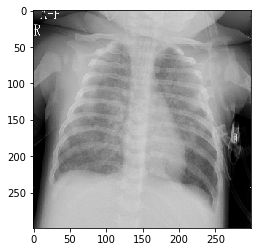

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
n1 = random.randint(0,9)
plt.imshow(x_val[n1])
print(f'Predicted: {categories[np.argmax(model.predict(x_val)[n1])]}')
print(f'Real value: {categories[y_val[n1]]}')


In [0]:
n2 = random.randint(0,9)
plt.imshow(x_val[n2])
print(f'Predicted: {categories[np.argmax(model.predict(x_val)[n2])]}')
print(f'Real value: {categories[y_val[n2]]}')


Predicted: PNEUMONIA
Real value: PNEUMONIA


Predicted: PNEUMONIA
Real value: PNEUMONIA


Predicted: PNEUMONIA
Real value: PNEUMONIA


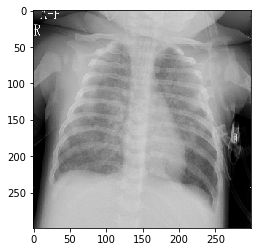

Predicted: PNEUMONIA
Real value: PNEUMONIA


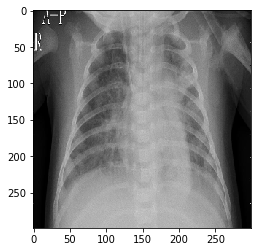

Predicted: NORMAL
Real value: NORMAL


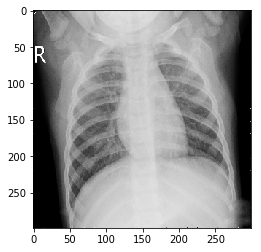

Predicted: PNEUMONIA
Real value: PNEUMONIA


Predicted: NORMAL
Real value: NORMAL


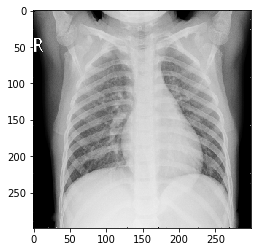

Predicted: PNEUMONIA
Real value: PNEUMONIA


Predicted: PNEUMONIA
Real value: NORMAL


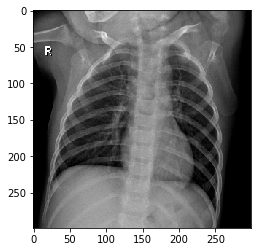

Predicted: PNEUMONIA
Real value: NORMAL


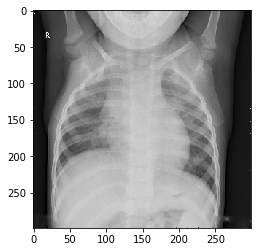

In [0]:
for i in range(0,9):
  plt.imshow(x_val[i])
  print(f'Predicted: {categories[np.argmax(model.predict(x_val)[i])]}')
  print(f'Real value: {categories[y_val[i]]}')
  plt.show()

#Credit : https://github.com/anjanatiha/Pneumonia-Detection-from-Chest-X-Ray-Images-with-Deep-Learning
# https://github.com/kapilnchauhan77/Health-App/blob/master/Health_app.ipynb